
### Data Description & Context: 
Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician

### Objective
Objective behind leveraging Machine Learning Algorithm for predicting Parkinson Disease in subjects:
PD patients exhibit characteristic vocal features and voice recordings are a useful and non-invasive tool for diagnosis.
So this case study aims at identifying if Machine learning algorithms can be applied to a voice recording dataset to accurately diagnosis PD;
if this is successful then this would be an effective screening step prior to an appointment with a clinician;

### Domain:
Medicine

### Attribute Information:
- name -ASCII subject name and recording number
- MDVP:Fo(Hz) -Average vocal fundamental frequency
- MDVP:Fhi(Hz) -Maximum vocal fundamental frequency
- MDVP:Flo(Hz) -Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP -Several measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA -Several measures of variation in amplitude
- NHR,HNR -Two measures of ratio of noise to tonal components in the voice
- status -Health status of the subject (one) -Parkinson's, (zero) -healthy
- RPDE,D2 -Two nonlinear dynamical complexity measuresDFA -Signal fractal scaling exponents
- spread1,spread2,PPE -Three nonlinear measures of fundamental frequency variation 


### More about the attributes
- MDVP: Fo (Hz) Average vocal fundamental
- MDVP: Fhi (Hz) Maximum vocal fundamental frequency
- MDVP: Flo (Hz) Minimum vocal fundamental frequency
- MDVP: Jitter (%) Kay Pentax MDVP jitter as percentage
- MDVP: Jitter (Abs) Kay Pentax MDVP absolute jitter in microseconds
- MDVP: RAP Kay Pentax MDVP relative amplitude perturbation
- MDVP: PPQ Kay Pentax MDVP five-point period perturbation quotient
- Jitter: DDP Average absolute difference of differences between cycles, divided by the average period
- MDVP: Shimmer Key Pentax MDVP local shimmer
- MDVP: Shimmer (dB) Key Pentax MDVP local shimmer in decibels
- Shimmer: APQ3 3 point amplitude perturbation quotient
- Shimmer: APQ5 5 point amplitude perturbation quotient
- MDVP: APQ Kay Pentax MDVP eleven-point amplitude perturbation quotient
- Shimmer: DDA Average absolute difference between consecutive differences between the amplitude of consecutive periods
- NHR Noise to harmonic ratio
- HNR Harmonics to noise ratio
- RPDE Recurrence period density entropy
- DFA Detrended fluctuation analysis
- spread1 Nonlinear measure of fundamental frequency
- spread2 Nonlinear measure of fundamental frequency
- D2 Pitch period entropy
- PPE Pitch

### Importing all the necessary libraries

In [5]:
#!pip install xgboost 

In [6]:
import pandas as pd    # for data manipulation
import numpy as np     # for linear algebra
import seaborn as sns  # for statistical data visualisation
import matplotlib.pyplot as plt # for data visualization
from scipy import stats        # for calculating statistics
from statsmodels.stats.outliers_influence import variance_inflation_factor # for calculating VIF

# Importing various machine learning algorithm from sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing various classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from vecstack import stacking


from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score,auc,mean_absolute_error,accuracy_score
from sklearn.metrics import roc_curve

### Load the dataset

In [7]:
df=pd.read_csv('Data - Parkinsons')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


This dataset is composed of a range of biomedical voice measurements. Each column in the table is a particular voice measure, and each row corresponds one of the voice recording from the individuals ("name" column). The rows contain an instance corresponding to one voice recording; There are around six recordings per patient.

The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

### Shape of the data

In [8]:
df.shape #displaying shape of the data
df.shape

(195, 24)

- There are 195 observations/Rows (Voice Recording) and 24 attributes/columns (Of Patients)

### Information about data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

- There are no null values in the dataset
- The attribute has one object or categorical data and one Int and everything else float data

In [10]:
df.isnull().any() # double checking for null values
#df.isnull().sum() # this also can be used to check the sum of all missing values
#incase of any missing value we can use df = df.dropna() to drop all missing value

name                False
MDVP:Fo(Hz)         False
MDVP:Fhi(Hz)        False
MDVP:Flo(Hz)        False
MDVP:Jitter(%)      False
MDVP:Jitter(Abs)    False
MDVP:RAP            False
MDVP:PPQ            False
Jitter:DDP          False
MDVP:Shimmer        False
MDVP:Shimmer(dB)    False
Shimmer:APQ3        False
Shimmer:APQ5        False
MDVP:APQ            False
Shimmer:DDA         False
NHR                 False
HNR                 False
status              False
RPDE                False
DFA                 False
spread1             False
spread2             False
D2                  False
PPE                 False
dtype: bool

### Deep Dive into the Data Frame

In [11]:
df.apply(lambda x: len(x.unique()))

name                195
MDVP:Fo(Hz)         195
MDVP:Fhi(Hz)        195
MDVP:Flo(Hz)        195
MDVP:Jitter(%)      173
MDVP:Jitter(Abs)     19
MDVP:RAP            155
MDVP:PPQ            165
Jitter:DDP          180
MDVP:Shimmer        188
MDVP:Shimmer(dB)    149
Shimmer:APQ3        184
Shimmer:APQ5        189
MDVP:APQ            189
Shimmer:DDA         189
NHR                 185
HNR                 195
status                2
RPDE                195
DFA                 195
spread1             195
spread2             194
D2                  195
PPE                 195
dtype: int64

#### From above data

"name" column represent each customer uniquly and don't provide any valuable prediction on Diagnosis Status.
- So this can be neglected in the model predictions

"status" column is our target variable and has categorical data

Below columns has all unique values

- PPE
- D2
- spread1
- DFA
- RPDE
- HNR
- MDVP:Flo(Hz)
- MDVP:Fhi(Hz)
- MDVP:Fo(Hz)

In [12]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

#### Challenges:

- In the target column which is status, there are 48 healthy people & 147 people with Parkinson's disease i.e. one of the two classes are skewed for which the accuaracy at the model can be misleading. So its better to consider accuaracy at the class level i.e. recall using confusion matrix also datapoints in status overlapped over majority region.
- Large set of attrinutes makes analysing pair plot difficult.

### Generating descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution

In [13]:
# Adding skewness column to the details to get a holistic view of the dataset from statistical perspective
temp_name = df.columns
df_copy = df.describe().transpose()
df_copy['Skewness']=round(df[temp_name].skew(),4)
pd.DataFrame(df_copy)

,count,mean,std,min,25%,50%,75%,max,Skewness
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000,0.5917
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000,2.5421
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000,1.2174
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160,3.0849
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260,2.6491
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440,3.3607
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580,3.0739
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330,3.3621
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080,1.6665
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000,1.9994


#### Observation :
- Data seems to be skewed for MDVP:Fhi(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:APQ, NHR,   MDVP:Shimmer(dB); which is also quite evident from the fact that the mean and median for these attributes are quite far. There might also be potential outliars
- For the atributes: MDVP:Flo(Hz), MDVP:Shimmer, Shimmer:APQ3, Shimmer:APQ5, Shimmer:DDA, status; there is slight skewness
- For the attributes:MDVP:Fo(Hz), HNR, RPDE, DFA, spread1, spread2, D2, PPE skewness is negligible.
- Note : Higher value of Standard Deviation (SD) means data is spread around mean and lower SD means data is closer to the mean.

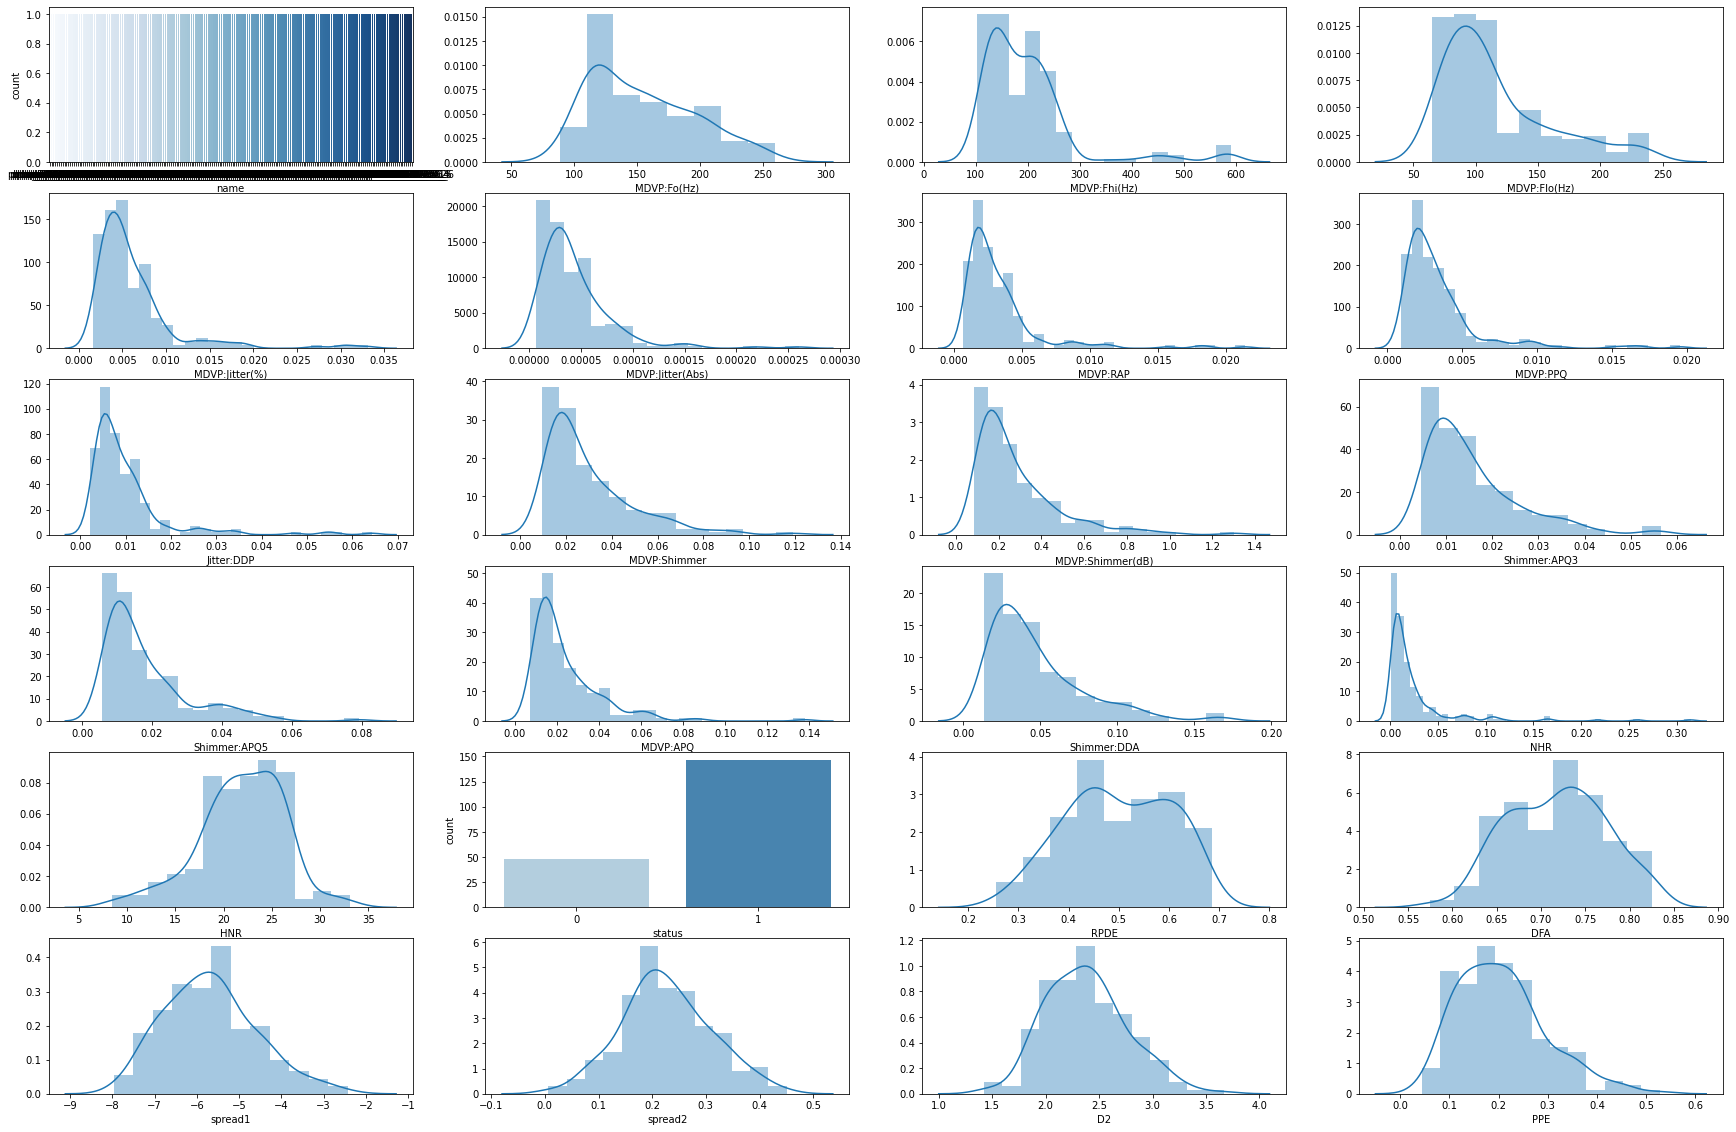

In [14]:
plt.figure(figsize= (30,20))  # Set the figure size
pos = 1    # a variable to manage the position of the subplot in the overall plot
for feature in df.columns:   # for-loop to iterate over every attribute whose distribution is to be visualized
    plt.subplot(6, 4, pos)   # plot grid
    if feature in ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:Jitter(Abs)','MDVP:RAP',
                  'MDVP:PPQ','Jitter:DDP','MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ',
                   'Shimmer:DDA','NHR','HNR','RPDE','DFA','spread1','spread2','D2','PPE']:   # Plot histogram for all the continuous columns
         sns.distplot(df[feature], kde= True )   
    else:
        sns.countplot(df[feature], palette= 'Blues')    # Plot bar chart for all the categorical columns
        #Shows the distribution of status column - univariate analysis of the target column
    pos += 1  # to plot over the grid one by one  

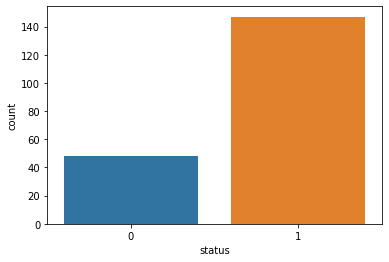

In [15]:
sns.countplot(x='status',data=df)
#Shows the distribution of status column - univariate analysis of the target column

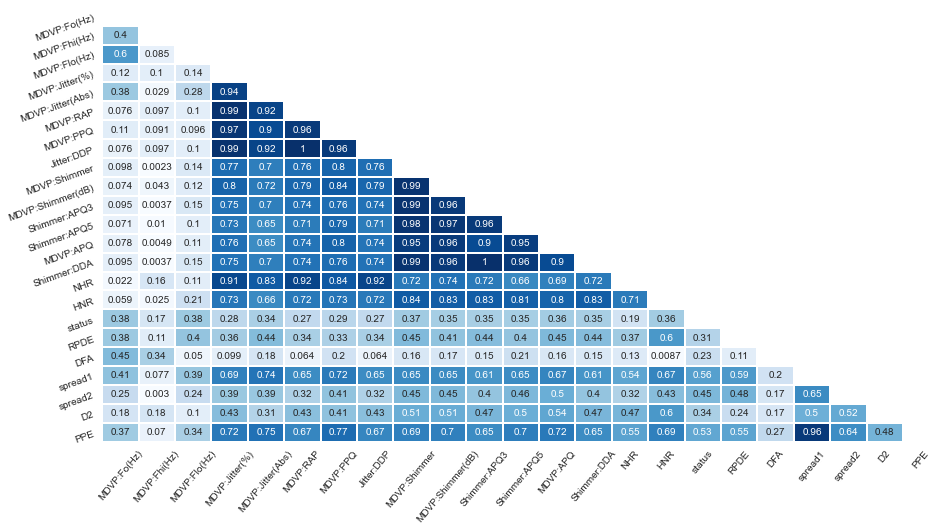

In [16]:
# Correlation among the attributes

corr = abs(df.corr()) # correlation matrix
lower_triangle = np.tril(corr, k = -1)  # select only the lower triangle of the correlation matrix
mask = lower_triangle == 0  # to mask the upper triangle in the following heatmap

plt.figure(figsize = (15,8))  # setting the figure size
sns.set_style(style = 'white')  # Setting it to white so that we do not see the grid lines
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # Da Heatmap
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()
#df.corr()

#### Likely Challange
- MultiCollinearity: There seems to exist high correlation between multiple independent attributes. This might be a problem since, we would not be able to distinguish between the individual effects of the independent attributes on the dependent attribute. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few attributes with high VIF.


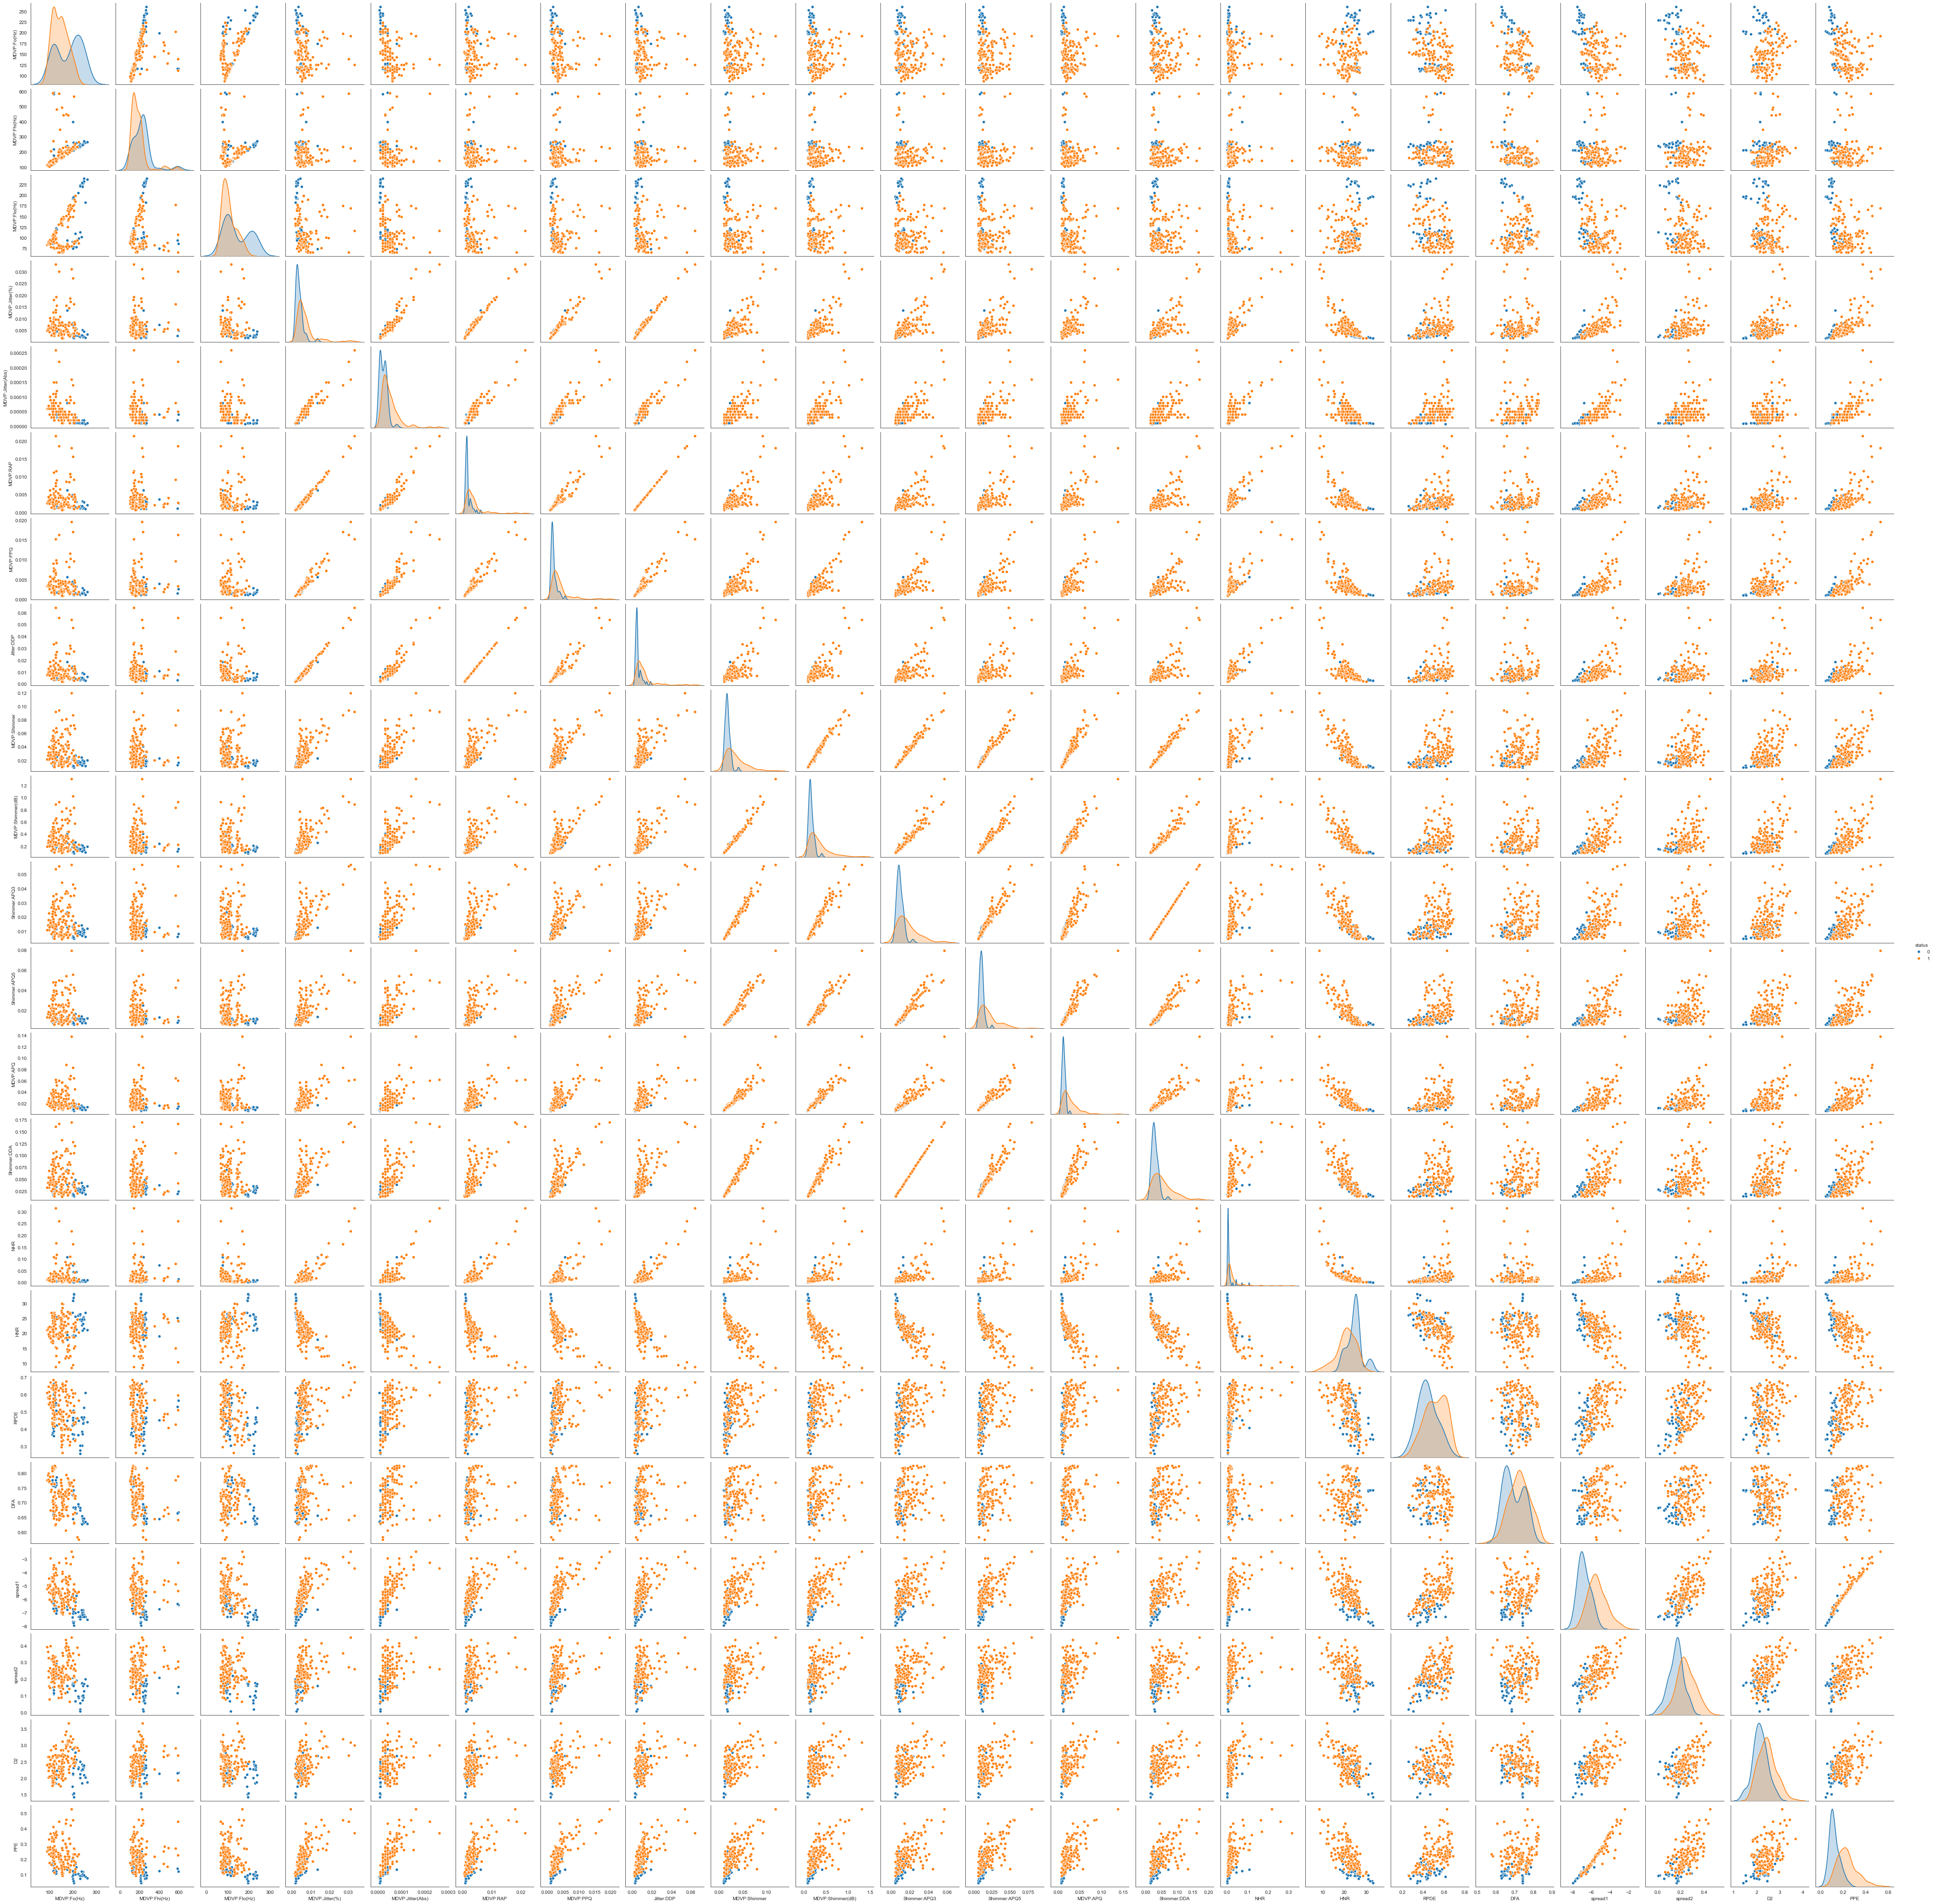

In [17]:
sns.pairplot(df, hue = 'status', diag_kind='kde')    # pairplot
plt.show()

#### Observations:
- various types Jitters, Shimmer and noice in voice parameter has higher correlation.
- various types of MDVP and DFA has lower corellation with others.
- Spread 1 interestingly has a higher corr with PPE or Pitch
- We can observe few columns are normally distributed like HNR.

In [14]:
df.drop(columns='name', inplace = True)   # Dropping the name column as this doesnot contribute towards the model building

#### Get the target column distribution
In the target column which is status, there are 48 healthy people & 147 people with Parkinson's disease.


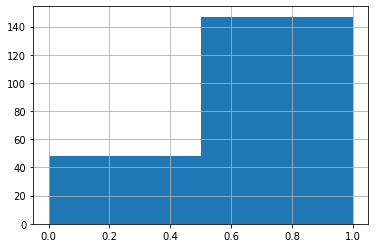

In [15]:
df['status'].hist(bins=2)

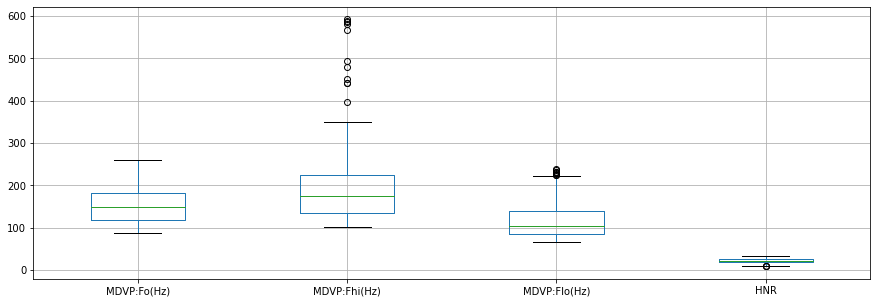

In [16]:
fig, ax = plt.subplots(figsize=(15,5))
df.boxplot(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','HNR'],ax=ax)


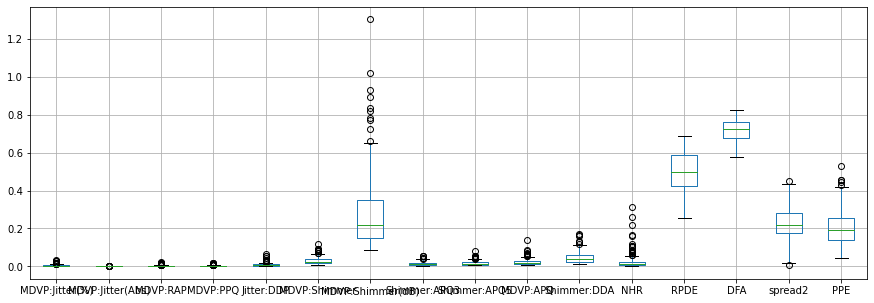

In [17]:
k=[]
for i in df.columns:
    for j in df[i]:
        if (j<1 and j>0):
            k.append(i)
            break

fig, ax = plt.subplots(figsize=(15,5))
df.boxplot(k,ax=ax)

#### Observations:
- From the box plots above, we can see that there are outliers or long tails or skewness in almost all the columns except MDVP:Fo(Hz), RPDE and DFA columns.
- In the columns which have outliers, most of them are positively skewed except HNR which is negatively skewed.
- In the column 'spread2', we can see the tails or outliers being present on both the sides.

#### looking at all the distribution of the attribute with the target (status)
0-healthy
1-Sick

In [18]:
df.groupby(df['status']).mean()
# 0 - healthy
# 1 - have the disease 

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


#### Observations
- From above we can observe various disturbances like noice, shimmer, jitter, perturbation has more impact on the diagnosis of perkinson disease.
- Where vocal fundamentals like MDVP:Fo, MDVP:Fhi, MDVP:Flo has positive impact on being healthy.

#### Checking and removing multi-collinearity
MultiCollinearity: Multicolinearity exists when there is high correlation between multiple independent variables. This might be a problem since, we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. We'll try to identify the multi-collinearity by leveraging VIF (Variable Inflation Factor) and if it is found to be high then we will attempt at reducing the multi-collinearity by deleting few variables with high VIF

- In this step we will check the multicollinearity by computing VIF (Variable Inflation Factors) score; VIF score of an independent variable represents how well the variable is explained by other independent variables.

In [19]:
df_copy_two=df.copy()#making a copy
#declaing a function to compute VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [20]:
calc_vif(round(df_copy_two,2))

C:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,variables,VIF
0,MDVP:Fo(Hz),53.518297
1,MDVP:Fhi(Hz),8.795329
2,MDVP:Flo(Hz),17.257065
3,MDVP:Jitter(%),7.607233
4,MDVP:Jitter(Abs),NaN
5,MDVP:RAP,6.262228
6,MDVP:PPQ,6.428414
7,Jitter:DDP,17.730525
8,MDVP:Shimmer,127.969986
9,MDVP:Shimmer(dB),179.950644


#### observation:

- From the VIF scores computed above, it clearly appears that dataset has high multicollinearity.
As discussed above, multicollinearity occurs when two or more independent variables are highly correlated with one another; which means that an independent variable can be predicted from another independent variable. Hence, we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.
It is important to reduce the multicollinearity; else our model might give biased outputs.
- Lets follow the approach of deleting one attribute at a time and checking the VIF of the remaining attributes. We will continue to delete one attribute and check VIF of remaining till VIF of remaining attributes is less than 10

In [21]:
# The attribute with the highest VIF is DFA. Dropping DFA from the dataset. 
#We also noticed that VIF of MDVP:Jitter(Abs) is Not a number. Hence, we will drop MDVP:Jitter(Abs) as well.

df_copy_two=df_copy_two.drop(['DFA','MDVP:Jitter(Abs)'],axis=1)

In [22]:
# calculating the VIF again
calc_vif(round(df_copy_two,2))

,variables,VIF
0,MDVP:Fo(Hz),44.272384
1,MDVP:Fhi(Hz),8.505372
2,MDVP:Flo(Hz),16.607835
3,MDVP:Jitter(%),7.290971
4,MDVP:RAP,6.201782
5,MDVP:PPQ,6.370538
6,Jitter:DDP,17.440786
7,MDVP:Shimmer,127.965900
8,MDVP:Shimmer(dB),176.538329
9,Shimmer:APQ3,50.929182


- It is clearly noticable that VIF of other variable has decreased when we dropped DFA from the data set.
- lets continue to delete attributes with highest VIF and check till the VIF of the remaining attributes is below 10; 


In [23]:
 df_copy_two=df_copy_two.drop(['MDVP:Shimmer(dB)','spread1','MDVP:Shimmer','D2','Shimmer:DDA','RPDE','Shimmer:APQ5','MDVP:Fo(Hz)',
                  'PPE','HNR','Shimmer:APQ3','Jitter:DDP'],axis=1)
 calc_vif(round(df_copy_two,2))

,variables,VIF
0,MDVP:Fhi(Hz),5.270265
1,MDVP:Flo(Hz),5.318641
2,MDVP:Jitter(%),4.763370
3,MDVP:RAP,4.363675
4,MDVP:PPQ,3.991209
5,MDVP:APQ,7.486624
6,NHR,5.310260
7,status,5.265450
8,spread2,11.066557


### Prepare the data for Models
- Applying Scaling as Different independent attributes have different scales e.g: DB, %age, Hz etc- Applying 

In [24]:
X = df_copy_two.drop(columns='status')    # Predictors
y = df.loc[:,'status']   # target

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, stratify = y) # Split data into test and train

In [74]:
# checking split of data
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df_copy_two.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df_copy_two.index)) * 100))

69.74% data is in training set
30.26% data is in test set


In [75]:
y_train_yPD=y_train[y_train==1].count()
y_train_nPD=y_train[y_train==0].count()
y_test_yPD=y_test[y_test==1].count()
y_test_nPD=y_test[y_test==0].count()

print("In the original dataset people who had parkinson Dieases    : {0} ({1:0.2f}%)".format(len(df_copy_two.loc[df['status'] == 1]), (len(df_copy_two.loc[df['status'] == 1])/len(df_copy_two.index)) * 100))
print("In the original dataset people who didnot have Parkinson Disease   : {0} ({1:0.2f}%)".format(len(df_copy_two.loc[df['status'] == 0]), (len(df_copy_two.loc[df['status'] == 0])/len(df_copy_two.index)) * 100))
print("")
print("In the training dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_train_yPD, (y_train_yPD/len(y_train))*100))
print("In the training dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_train_nPD, (y_train_nPD/len(y_train))*100))
print("")
print("In the test dataset people who who had parkinson Dieases    : {0} ({1:0.2f}%)".format(y_test_yPD, (y_test_yPD/len(y_test))*100))
print("In the test dataset people who didnot have Parkinson Disease    : {0} ({1:0.2f}%)".format(y_test_nPD, (y_test_nPD/len(y_test))*100))

In the original dataset people who had parkinson Dieases    : 147 (75.38%)
In the original dataset people who didnot have Parkinson Disease   : 48 (24.62%)

In the training dataset people who who had parkinson Dieases    : 103 (75.74%)
In the training dataset people who didnot have Parkinson Disease    : 33 (24.26%)

In the test dataset people who who had parkinson Dieases    : 44 (74.58%)
In the test dataset people who didnot have Parkinson Disease    : 15 (25.42%)


#### Scaling of the Data

- From the dataset it is quite evident that different independent variables have different scales e.g: DB, %age, Hz etc. Now, Machine learning algorithms dont recognize the unit of data; Hence, it won't be prudent to compare DB with a %age or %age with Hz. Higher ranging numbers in one of the attributes will have superiority. 10 DB and 10% means different but machine learning algorithm understand both to be the same.

##### Scales impacts

- gradient descent based algorithms like Linear Regression, Logistics Regression
- Distance based algorithms like KNN, K-means and SVM

##### Scales dont impact:

- Tree based algorithms like Decision trees

In [76]:
# fitting a scaler function to scale test and train to avoid data leakage aka to keep the sanctity of the test data

scaler = StandardScaler()  # A scaler function (z-score scaler)

#fitting the scaler funstion with train set
scaler.fit(X_train.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:RAP',
                  'MDVP:PPQ','MDVP:APQ','NHR','spread2']])

X_train_scaled = scaler.transform(X_train.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:RAP',
                  'MDVP:PPQ','MDVP:APQ','NHR','spread2']])
X_test_scaled = scaler.transform(X_test.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:RAP',
                  'MDVP:PPQ','MDVP:APQ','NHR','spread2']])


X_train.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:RAP',
                  'MDVP:PPQ','MDVP:APQ','NHR','spread2']] = X_train_scaled 
X_test.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:RAP',
                  'MDVP:PPQ','MDVP:APQ','NHR','spread2']] = X_test_scaled

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-76-cb2ae8ca02f6>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP:Jitter(%)', 'MDVP:RAP',
<ipython-input-76-cb2ae8ca02f6>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.loc[:,['MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','MDVP

In [77]:
# Since we will be using multiple models using the same data, the following is a user defined function for that purpose 

def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, and data as inputs
    from sklearn import metrics
    
    model.fit(X_train, y_train)   # fir the model with the train data

    pred = model.predict(X_test)  # make predictions on the test set

    score = round(model.score(X_test, y_test), 3)   # compute accuracy score for test set


    tn, fp, fn, tp = metrics.confusion_matrix(y_test, pred).ravel()  # compute the confusion matrix from the predictions and actuals

    recall = round(tp/(tp+fn), 3)   
    precision = round(tp/(tp+fp), 3)  
    specificity =round(tn/(tn+fp),3) 
    f1_score =  round(2*precision*recall/(precision + recall), 3)
    
    return score, recall, precision, specificity, f1_score  # return all the metrics

### Training Standard Classification Models
#### What we are trying to find?
- Our aim is to identify as much person with PD disease as possible, so we have to give important to Recall (true positivity rate) along with accuracy (among all persons who have PD, how many actually have it)

#### The following are the performance measures:

- The accuracy: It is out of all subjects in the data, how many were predicted correctly for having the disease or not having the disease = ((TP+TN)/(TP+TN+FP+FN))
- The recall: It is out of all subjects who had parkinson Disease, how many did we identify = ((TP/(TP+FN)))
- The precision: It is out of all subjects who were predicted to have Parkinson Disease, how many actually had parkinson Disease = (TP/(TP+FP))
- Specificity : (True Negative Rate) It is out of all subjects who dont have parkinson Disease, how many did we identify = ((TN/(TN+FP))
- The F1 score which is computed considering both precision and recall together: 2PR/(P+R)


In [30]:
lr = LogisticRegression(solver = 'liblinear')  
lr_accuracy, lr_recall, lr_precision, lr_specificity, lr_f1_score = fit_n_print(lr, X_train, X_test, y_train, y_test)

knn = KNeighborsClassifier()
knn_accuracy, knn_recall, knn_precision, knn_specificity, knn_f1_score = fit_n_print(knn, X_train, X_test, y_train, y_test )

nb = GaussianNB()
nb_accuracy, nb_recall, nb_precision, nb_specificity, nb_f1_score = fit_n_print(nb, X_train, X_test, y_train, y_test )

svm = SVC(gamma = 'auto', kernel= 'poly', degree=2)
svm_accuracy, svm_recall, svm_precision, svm_specificity, svm_f1_score = fit_n_print(svm, X_train, X_test, y_train, y_test )

#### Confusion Matrix - Logistic Regression

Confusion Matrix - Logistic Regression


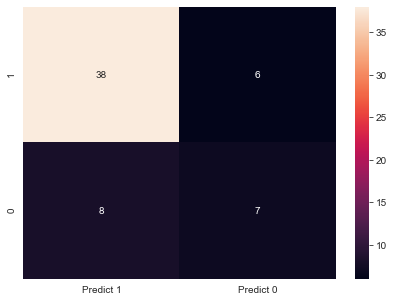

In [52]:
print("Confusion Matrix - Logistic Regression")
cm=metrics.confusion_matrix(y_test, lr.predict(X_test), labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Logistic Regression

- True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 38

- True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 7

- False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

- False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 6

#### Confusion Matrix - KNN

Confusion Matrix - KNN


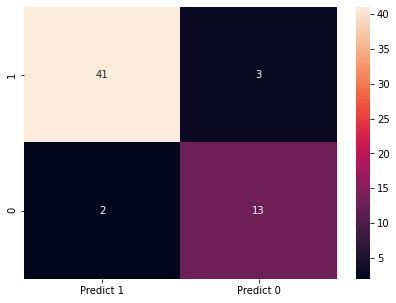

In [32]:
print("Confusion Matrix - KNN")
cm=metrics.confusion_matrix(y_test, knn.predict(X_test), labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: KNN

- True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 41

- True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 13

- False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 2

- False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 3

#### Confusion Matrix - Naive Bayes

Confusion Matrix - Naive Bayes


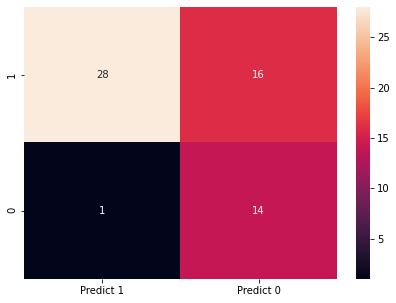

In [33]:
print("Confusion Matrix - Naive Bayes")
cm=metrics.confusion_matrix(y_test, nb.predict(X_test), labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Naive Bayes

- True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 28

- True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 14
- False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 1

- False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 16

#### Confusion Matrix - SVM

Confusion Matrix - SVM


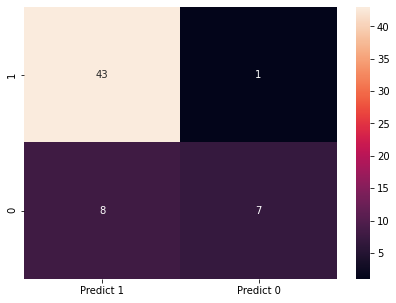

In [34]:
print("Confusion Matrix - SVM")
cm=metrics.confusion_matrix(y_test, svm.predict(X_test), labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

The confusion matrix: Logistic Regression

- True Positives (TP): We correctly predicted the count of subjects having Parkinson Disease and they actually had PD: 43

- True Negatives (TN): We correctly predicted the count of subjects not having Parkinson Disease and they actually dint have PD: 7

- False Positives (FP): We incorrectly predicted the count of subjects have Parkinson Disease but they actually dint have PD: 8

- False Negatives (FN): We incorrectly predicted the count of subjects not having Parkinson Disease but they actually had PD: 1

In [35]:
    result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', "Naive Bayes'", 'SVM'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy ],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall ],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity ],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score]})
    result1

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.881,0.977,0.878,0.600,0.925
1,KNN,0.915,0.932,0.953,0.867,0.942
2,Naive Bayes',0.712,0.636,0.966,0.933,0.767
3,SVM,0.847,0.977,0.843,0.467,0.905


#### Observations

- The recall of the logistic Regression model is 0.97; which means we were able to idetify most the subjects who had the disease.
- KNN recall is 0.93; which means KNN not able to identify all the subjects who have the desease compare to Logistic regression.
- Naive Bayes giving worst Recall among all models, which means we are not able to identify all the subject who had PD.
- The recall of the SVM model is 0.97; which means we were able to idetify all the subjects who had the disease.
- looking at all parameter logistic Regression model is giving the best result.

#### Training a meta-classifier and observing the accuracy on test data

- selecting below meta classifiers to train

- Stacking from the  library SKlearn. 
The models selected as estimators are KNN,Random Forest and XGBClassifier
The meta model selected is XGBClassifier


#### Meta Classifier : Stacking Classifier from SKLearn

In [46]:
estimators = [
    ('rf', RandomForestClassifier(random_state=0, n_estimators=100, max_depth=3)),
#     ('lr', LogisticRegression(solver="liblinear")),
    ('knn',KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )),
    ('XGB',XGBClassifier(random_state=0, learning_rate=0.1, n_estimators=100, max_depth=3))
]

In [47]:
clf = StackingClassifier(
    estimators=estimators, final_estimator=XGBClassifier()
)

In [48]:
model = clf.fit(X_train, y_train)
y_predict_Stack2 = model.predict(X_test)
print('The accuracy of the meta classifier 2 is: [%.8f]' % accuracy_score(y_test, y_predict_Stack2))

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:19:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

Confusion Matrix - Meta Classifer 2


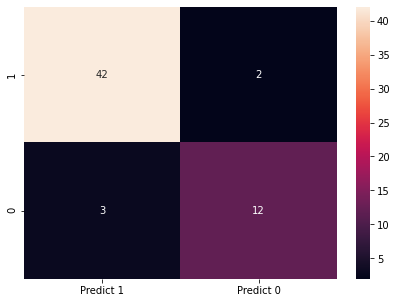

In [49]:
#Confusion Matrix
print("Confusion Matrix ")
cm=metrics.confusion_matrix(y_test, y_predict_Stack2, labels=[1, 0])
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [51]:
# Classification Report
print("Classification Report")
print(metrics.classification_report(y_test, y_predict_Stack2, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.95      0.94        44
           0       0.86      0.80      0.83        15

    accuracy                           0.92        59
   macro avg       0.90      0.88      0.89        59
weighted avg       0.91      0.92      0.91        59



#### Observation:

Meta classifier has a recall of less than 1 which means that we were not able to identify all the subjects who had Parkinson Disease.

#### Train at least one standard Ensemble model - Random forest, Bagging, Boosting etc, and note the accuracy

Lets train the following classification algorithms:

- Random Forest
- Bagging
- Ada Boost


In [78]:
model_rf = RandomForestClassifier(n_estimators = 50,random_state=1,max_features=3) 
rf_accuracy, rf_recall, rf_precision, rf_specificity, rf_f1_score = fit_n_print(model_rf, X_train, X_test, y_train, y_test)

bgcl = BaggingClassifier(n_estimators=50,random_state=1)
bgcl_accuracy, bgcl_recall, bgcl_precision, bgcl_specificity, bgcl_f1_score = fit_n_print(bgcl, X_train, X_test, y_train, y_test )

AdaBC = AdaBoostClassifier(n_estimators=50, random_state=1)
AdaBC_accuracy, AdaBC_recall, AdaBC_precision, AdaBC_specificity, AdaBC_f1_score = fit_n_print(AdaBC, X_train, X_test, y_train, y_test )



Confusion Matrix - Random Forest


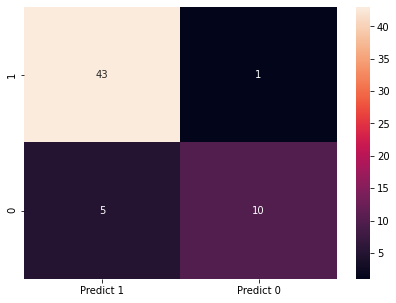

In [83]:
print("Confusion Matrix - Random Forest")
cm=metrics.confusion_matrix(y_test, model_rf.predict(X_test), labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);



Confusion Matrix - Bagging Classifier


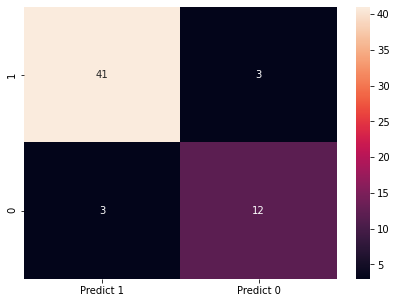

In [85]:
print("Confusion Matrix - Bagging Classifier")
cm=metrics.confusion_matrix(y_test, bgcl.predict(X_test), labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

Confusion Matrix - AdaBoost Classifier


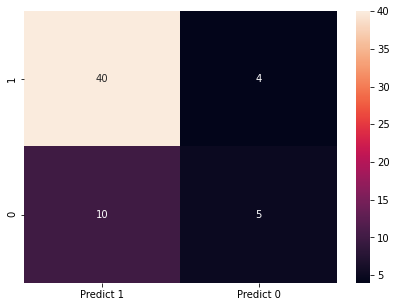

In [86]:
print("Confusion Matrix - AdaBoost Classifier")
cm=metrics.confusion_matrix(y_test, AdaBC.predict(X_test), labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

#### Comparing All Ensemble Model

In [79]:
result1 = pd.DataFrame({'Model' : ['Random Forest', 'Bagging', "Ada Boost'"],
                          'Accuracy': [ rf_accuracy ,  bgcl_accuracy ,  AdaBC_accuracy],
                          'Recall' : [rf_recall ,  bgcl_recall ,  AdaBC_recall],
                          'Precision': [rf_precision ,  bgcl_precision ,  AdaBC_precision ],
                          'Specificity': [rf_specificity ,  bgcl_specificity ,  AdaBC_specificity],
                          'F1 Score' : [rf_f1_score, bgcl_f1_score, AdaBC_f1_score]})
result1

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Random Forest,0.898,0.977,0.896,0.667,0.935
1,Bagging,0.898,0.932,0.932,0.800,0.932
2,Ada Boost',0.763,0.909,0.800,0.333,0.851


#### Among all Ensemble model Random Forest has the best Recall, which means its able to identify Subjects with PD better than other two. While Bagging has higher accuracy but out intention here to identify Subjects with the Disease so Random Forest performs better with this data set

### Capture all Models

In [87]:
result1 = pd.DataFrame({'Model' : ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM','Random Forest', 'Bagging', 'Ada Boost'],
                          'Accuracy': [ lr_accuracy ,  knn_accuracy ,  nb_accuracy ,  svm_accuracy, rf_accuracy ,  bgcl_accuracy ,  AdaBC_accuracy],
                          'Recall' : [lr_recall ,  knn_recall ,  nb_recall ,  svm_recall, rf_recall ,  bgcl_recall ,  AdaBC_recall],
                          'Precision': [lr_precision ,  knn_precision ,  nb_precision ,  svm_precision, rf_precision ,  bgcl_precision ,  AdaBC_precision ],
                          'Specificity': [lr_specificity ,  knn_specificity ,  nb_specificity ,  svm_specificity, rf_specificity ,  bgcl_specificity ,  AdaBC_specificity],
                          'F1 Score' : [lr_f1_score, knn_f1_score, nb_f1_score, svm_f1_score, rf_f1_score, bgcl_f1_score, AdaBC_f1_score]})
result1

,Model,Accuracy,Recall,Precision,Specificity,F1 Score
0,Logistic Regression,0.881,0.977,0.878,0.600,0.925
1,KNN,0.915,0.932,0.953,0.867,0.942
2,Naive Bayes,0.712,0.636,0.966,0.933,0.767
3,SVM,0.847,0.977,0.843,0.467,0.905
4,Random Forest,0.898,0.977,0.896,0.667,0.935
5,Bagging,0.898,0.932,0.932,0.800,0.932
6,Ada Boost,0.763,0.909,0.800,0.333,0.851


#### Above captures performance measures of all the models trained by us.
- Our main objective is to identify all the subjects which have Parkinson Disease.
- Recall gives us the required result. i.e. Out of all the subjects who had Parkinson Disease; how many did our model identify.

#### Among all models Logistic Regression, SVM and Random Forest is giving us highest Recall rate of 0.977 but looking at F1 score Random Forest is little better than all the Models 
